In [69]:
# Importação das bibliotecas
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from yellowbrick.classifier import ConfusionMatrix 
from sklearn.ensemble import ExtraTreesClassifier

In [70]:
#Load dataset 
credit = pd.read_csv('Credit.csv')
display(credit)

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,<0,6,'critical/other existing credit',radio/tv,1169,'no known savings',>=7,4,'male single',none,...,'real estate',67,none,own,2,skilled,1,yes,yes,good
1,0<=X<200,48,'existing paid',radio/tv,5951,<100,1<=X<4,2,'female div/dep/mar',none,...,'real estate',22,none,own,1,skilled,1,none,yes,bad
2,'no checking',12,'critical/other existing credit',education,2096,<100,4<=X<7,2,'male single',none,...,'real estate',49,none,own,1,'unskilled resident',2,none,yes,good
3,<0,42,'existing paid',furniture/equipment,7882,<100,4<=X<7,2,'male single',guarantor,...,'life insurance',45,none,'for free',1,skilled,2,none,yes,good
4,<0,24,'delayed previously','new car',4870,<100,1<=X<4,3,'male single',none,...,'no known property',53,none,'for free',2,skilled,2,none,yes,bad
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,'no checking',12,'existing paid',furniture/equipment,1736,<100,4<=X<7,3,'female div/dep/mar',none,...,'real estate',31,none,own,1,'unskilled resident',1,none,yes,good
996,<0,30,'existing paid','used car',3857,<100,1<=X<4,4,'male div/sep',none,...,'life insurance',40,none,own,1,'high qualif/self emp/mgmt',1,yes,yes,good
997,'no checking',12,'existing paid',radio/tv,804,<100,>=7,4,'male single',none,...,car,38,none,own,1,skilled,1,none,yes,good
998,<0,45,'existing paid',radio/tv,1845,<100,1<=X<4,4,'male single',none,...,'no known property',23,none,'for free',1,skilled,1,yes,yes,bad


In [71]:
# Separate the class (y) from the predictor variables (x)
predictor = credit.iloc[:,0:20].values
class_ = credit.iloc[:,20].values

In [72]:
# Transformation of categorical attributes into numerical attributes, passing the index of each categorical column
# We need to create an object for each categorical attribute, because in the sequence we will perform the encoding process again for the test record
# If different objects are used, the number assigned to each value may be different, which will leave the test inconsistent

labelencoder1 = LabelEncoder()
predictor[:,0] = labelencoder1.fit_transform(predictor[:,0])

labelencoder2 = LabelEncoder()
predictor[:,2] = labelencoder2.fit_transform(predictor[:,2])

labelencoder3 = LabelEncoder()
predictor[:, 3] = labelencoder3.fit_transform(predictor[:, 3])

labelencoder4 = LabelEncoder()
predictor[:, 5] = labelencoder4.fit_transform(predictor[:, 5])

labelencoder5 = LabelEncoder()
predictor[:, 6] = labelencoder5.fit_transform(predictor[:, 6])

labelencoder6 = LabelEncoder()
predictor[:, 8] = labelencoder6.fit_transform(predictor[:, 8])

labelencoder7 = LabelEncoder()
predictor[:, 9] = labelencoder7.fit_transform(predictor[:, 9])

labelencoder8 = LabelEncoder()
predictor[:, 11] = labelencoder8.fit_transform(predictor[:, 11])

labelencoder9 = LabelEncoder()
predictor[:, 13] = labelencoder9.fit_transform(predictor[:, 13])

labelencoder10 = LabelEncoder()
predictor[:, 14] = labelencoder10.fit_transform(predictor[:, 14])

labelencoder11 = LabelEncoder()
predictor[:, 16] = labelencoder11.fit_transform(predictor[:, 16])

labelencoder12 = LabelEncoder()
predictor[:, 18] = labelencoder12.fit_transform(predictor[:, 18])

labelencoder13 = LabelEncoder()
predictor[:, 19] = labelencoder13.fit_transform(predictor[:, 19])

display(predictor)

array([[2, 6, 1, ..., 1, 1, 1],
       [1, 48, 3, ..., 1, 0, 1],
       [0, 12, 1, ..., 2, 0, 1],
       ...,
       [0, 12, 3, ..., 1, 0, 1],
       [2, 45, 3, ..., 1, 1, 1],
       [1, 45, 1, ..., 1, 0, 1]], dtype=object)

In [73]:
#Division of dataset into train and test (70% for training and 30% for testing)
x_train, x_test, y_train, y_test = train_test_split(predictor, class_, test_size = 0.3, random_state = 0)

In [74]:
# Criação do modelo, treinamento, obtenção das previsões e da taxa de acerto
rnd_forest = RandomForestClassifier(n_estimators = 100)
rnd_forest.fit(x_train, y_train)

RandomForestClassifier()

In [75]:
def confusion(x_train, y_train, x_test, y_test, prediction):
    """This function returns a confusion matrix with the accuracy of the model
       and other metrics 

    Args:
        x_train (_array_): _predictor array used in training_
        y_train (_array_): _class array used in training_
        x_test (_array_): _predictor array used to test_
        y_test (_array_): _class array used to test_
        prediction (_array_): _prediction array from the ML model_
    """
    confusion = confusion_matrix(y_test, prediction)
    TP = confusion[0][0] #True Positive
    FN = confusion[0][1] #False Negative
    FP = confusion[1][0] #False Positive
    TN = confusion[1][1] #True Negative
    
    P  = TP + FN #All Positive results
    N  = TN + FP #All Negative results
    
    TPR = TP/P #True Positive Rate
    TNR = TN/N #True Negative Rate
    PPV = TP/(TP+FP) #Positive Predictive Value
    NPV = TN/(TN+FN) #Negative Predictive Value
    ACC = (TP+TN)/(P+N) #Accuracy

    #Display the confusion matrix
    conf_image = ConfusionMatrix(RandomForestClassifier(n_estimators = 100))
    conf_image.fit(x_train, y_train)
    conf_image.score(x_test, y_test)
    conf_image.poof()
    
    print(f"True positive rate (TPR): {TPR*100:.1f} %")
    print(f"True negative rate (TNR): {TNR*100:.1f} %")
    print(f"Positive predictive value (PPV): {PPV*100:.1f} %")
    print(f"Negative predictive value (NPV): {NPV*100:.1f} %")
    print(f"Accuracy: {ACC*100:.1f} %")
    
    return (TPR, TNR, PPV, NPV, ACC)

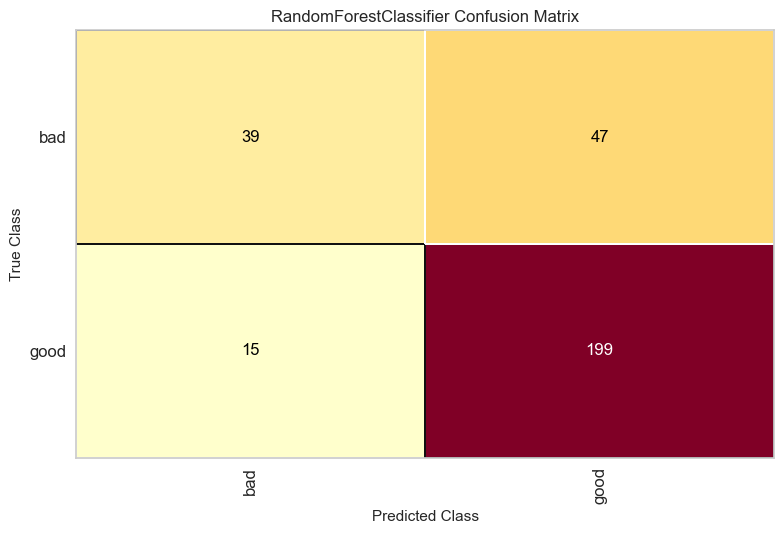

True positive rate (TPR): 41.9 %
True negative rate (TNR): 92.5 %
Positive predictive value (PPV): 69.2 %
Negative predictive value (NPV): 79.8 %
Accuracy: 78.0 %


In [76]:
prediction = rnd_forest.predict(x_test)
[TPR, TNR, PPV, NPV, ACC] = confusion(x_train, y_train, x_test, y_test, prediction)


In [77]:
# Use of the ExtraTreesClassifier algorithm to extract the most important characteristics
forest = ExtraTreesClassifier()
forest.fit(x_train, y_train)
importances = forest.feature_importances_
print(importances)

[0.1119629  0.08381226 0.06084593 0.05692532 0.08258201 0.04821152
 0.0528014  0.04909877 0.04290418 0.02668518 0.05237057 0.05041231
 0.066396   0.03617925 0.03827272 0.03625736 0.04237705 0.02395322
 0.0301248  0.00782725]


In [78]:
# Sorting the list
big = list(set(importances))
big.sort()

#Define the number of features to be used in model construction
n = 16

# Finding the biggest importances
best_importances = []
for i in range(1,n+1):
    print(big[-i])
    big_index = np.where(importances == big[-i])
    best_importances.append(big_index[0][0])

print(best_importances)

0.11196290094850045
0.08381226486026325
0.08258201399804818
0.06639600009676634
0.06084592912054384
0.056925319191823455
0.052801399304580623
0.052370573170327395
0.050412312912479953
0.0490987665930762
0.0482115153801449
0.04290417785100721
0.04237704720083197
0.038272719813877476
0.03625736318460356
0.03617925281563097
[0, 1, 4, 12, 2, 3, 6, 10, 11, 7, 5, 8, 16, 14, 15, 13]


In [79]:
# Creation of a new database using only the most important attributes
x_train2 = x_train[:,best_importances]
x_test2 = x_test[:,best_importances]

In [80]:
# Create another model with reduced database, training and obtaining predictions
forest2 = RandomForestClassifier(n_estimators = 100)
forest2.fit(x_train2, y_train)
prediction2 = forest2.predict(x_test2)

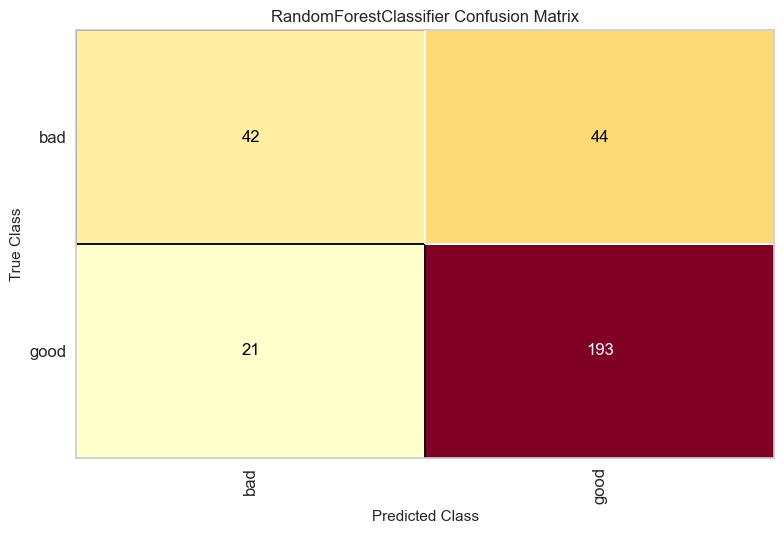

True positive rate (TPR): 46.5 %
True negative rate (TNR): 89.7 %
Positive predictive value (PPV): 64.5 %
Negative predictive value (NPV): 80.7 %
Accuracy: 77.3 %


In [81]:
#Confusion Matrix for reduced test dataset
[TPR2, TNR2, PPV2, NPV2, ACC2] = confusion(x_train2, y_train, x_test2, y_test, prediction2)

In [82]:
#summary of the results
if ACC2 > ACC:
    print(f'The attribute selection improved the accuracy of the model : {ACC*100:.1f} --> {ACC2*100:.1f} %' )
else:
    print(f'The attribute selection did not improve the accuracy of the model : {ACC*100:.1f} --> {ACC2*100:.1f} %' )

The attribute selection did not improve the accuracy of the model : 78.0 --> 77.3 %


PREDICT A NEW CLASS FROM NEW DATA

In [83]:
#Verify the class with a new record 
new_credit = pd.read_csv('NewCredit.csv')
display(new_credit)

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,residence_since,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker
0,'no checking',12,'existing paid','new car',689,<100,>=7,4,'male single',none,4,'no known property',38,stores,rent,1,skilled,1,yes,no
1,<0,13,'critical/other existing credit',education,2000,<100,>=7,5,'male single',guarantor,1,car,79,none,own,2,skilled,3,yes,yes


In [84]:
# We use the same object that was created before, to maintain the data pattern
# We only call the "transform" method, as the adaptation to the data (fit) has been done previously
new_credit = new_credit.iloc[:,0:20].values
new_credit[:,0] = labelencoder1.transform(new_credit[:,0])
new_credit[:, 2] = labelencoder2.transform(new_credit[:, 2])
new_credit[:, 3] = labelencoder3.transform(new_credit[:, 3])
new_credit[:, 5] = labelencoder4.transform(new_credit[:, 5])
new_credit[:, 6] = labelencoder5.transform(new_credit[:, 6])
new_credit[:, 8] = labelencoder6.transform(new_credit[:, 8])
new_credit[:, 9] = labelencoder7.transform(new_credit[:, 9])
new_credit[:, 11] = labelencoder8.transform(new_credit[:, 11])
new_credit[:, 13] = labelencoder9.transform(new_credit[:, 13])
new_credit[:, 14] = labelencoder10.transform(new_credit[:, 14])
new_credit[:, 16] = labelencoder11.transform(new_credit[:, 16])
new_credit[:, 18] = labelencoder12.transform(new_credit[:, 18])
new_credit[:, 19] = labelencoder13.transform(new_credit[:, 19])

In [85]:
# prediction results
results = forest.predict(new_credit)
print(f"Credit analysis (first client): {results[0]}")
print(f"Credit analysis (second client): {results[1]}")

Credit analysis (first client): good
Credit analysis (second client): good
